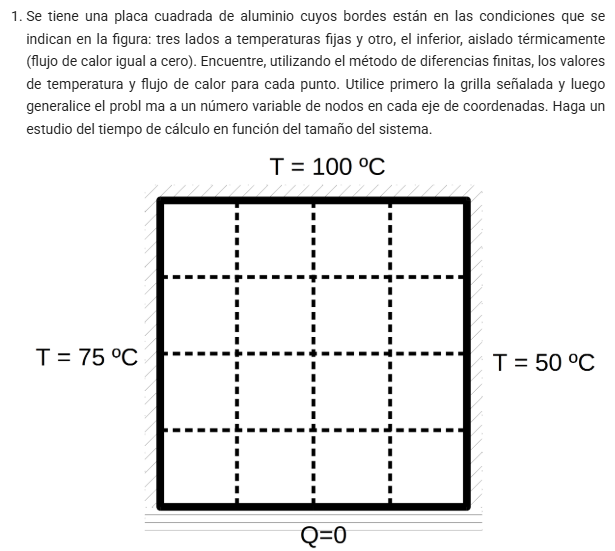

Consultas como se hace en clase

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [18]:
def temp_chapa(cond_contor,Nx,Ny,typ_cond_contorno):

    beta = Nx/Ny

    b = np.zeros((Nx,Ny))

    if typ_cond_contorno['A'] == 'temp' and typ_cond_contorno['D'] == 'flu':
        b[0,0] = cond_contor['A']

    elif typ_cond_contorno['A'] == 'flu' and typ_cond_contorno['D'] == 'temp':
        b[0,0] = cond_contor['D']

    elif typ_cond_contorno['A'] == 'temp' and typ_cond_contorno['D'] == 'temp':
        b[0,0] = (cond_contor['A'] + cond_contor['D'])/2

    if typ_cond_contorno['A'] == 'temp':
        b[0,1:Nx-1] = cond_contor['A'] 
    elif typ_cond_contorno['A'] == 'flu':
        b[0,1:Nx-1] = 2*5*cond_contor['A'] 

    #............................................................................

    if typ_cond_contorno['A'] == 'temp' and typ_cond_contorno['B'] == 'flu':
        b[0,Nx-1] = cond_contor['A']

    elif typ_cond_contorno['A'] == 'flu' and typ_cond_contorno['B'] == 'temp':
        b[0,Nx-1] = cond_contor['B']

    elif typ_cond_contorno['A'] == 'temp' and typ_cond_contorno['B'] == 'temp':
        b[0,Nx-1] = (cond_contor['A'] + cond_contor['B'])/2

    if typ_cond_contorno['B'] == 'temp':
        b[1:Ny-1,-1] = cond_contor['B']
    elif typ_cond_contorno['B'] == 'flu':
        b[1:Ny-1,-1] = 2*5*cond_contor['B']

    if typ_cond_contorno['B'] == 'temp' and typ_cond_contorno['C'] == 'flu':
        b[-1,-1] = cond_contor['B']

    elif typ_cond_contorno['B'] == 'flu' and typ_cond_contorno['C'] == 'temp':
        b[-1,-1] = cond_contor['C']

    elif typ_cond_contorno['B'] == 'temp' and typ_cond_contorno['C'] == 'temp':
        b[-1,-1] = (cond_contor['B'] + cond_contor['C'])/2

    if typ_cond_contorno['C'] == 'temp':
        b[-1,1:Nx-1] = cond_contor['C']
    elif typ_cond_contorno['C'] == 'flu':
        b[-1,1:Nx-1] = 2*5*cond_contor['C']

    if typ_cond_contorno['C'] == 'temp' and typ_cond_contorno['D'] == 'flu':
        b[-1,0] = cond_contor['C']

    elif typ_cond_contorno['C'] == 'flu' and typ_cond_contorno['D'] == 'temp':
        b[-1,0] = cond_contor['D']
        
    elif typ_cond_contorno['C'] == 'temp' and typ_cond_contorno['D'] == 'temp':
        b[-1,0] = (cond_contor['C'] + cond_contor['D'])/2

    if typ_cond_contorno['D'] == 'temp':
        b[1:Ny-1,0] = cond_contor['D']
    elif typ_cond_contorno['D'] == 'flu':
        b[1:Ny-1,0] = 2*5*cond_contor['D']

    b = b.flatten()

    #   Esto es para tomar las filas y columnas internas.

    filas_internas = np.arange(1, Ny-1)
    columnas_internas = np.arange(1,Nx-1)
    indices_filas_int, indices_columnas_int = np.meshgrid(filas_internas,columnas_internas,indexing='ij')
    
    flat_indices = np.ravel_multi_index((indices_filas_int.flatten(),indices_columnas_int.flatten()),(Nx,Ny))

    #   .........................................................................................................
    #   Esto es para completar la matriz A ... Pero esto es si tenemos en todos los bordes la condicion de temperatura

    A = np.eye(Nx*Ny)

    A [flat_indices,flat_indices]= - 2 * ( 1 + beta**2 )
    A [flat_indices,flat_indices-1]= 1
    A [flat_indices,flat_indices+1]= 1
    A [flat_indices,flat_indices-Nx]= beta**2
    A [flat_indices,flat_indices+Nx]= beta**2


    #   .........................................................................................................
    #   .........................................................................................................
    #   Condiciones de contorno para bordes con flujo de calor


    if typ_cond_contorno['A'] == 'flu':

        filaFlujo = 0
        columnaFlujo = np.arange(1,Nx-1)        
        indices_filas_int, indices_columnas_int = np.meshgrid(filaFlujo,columnaFlujo,indexing='ij')   
        indices = np.ravel_multi_index((indices_filas_int.flatten(),indices_columnas_int.flatten()),(Nx,Ny))

        A[indices, indices] = -2*(1 + beta**2)
        A[indices, indices + 1] = 1
        A[indices, indices - 1] = 1
        A[indices, indices + Nx] = 2*beta**2
    
 
    if typ_cond_contorno['C'] == 'flu':

        filaFlujo = Ny - 1
        columnaFlujo = np.arange(1,Nx-1)       
        indices_filas_int, indices_columnas_int = np.meshgrid(filaFlujo,columnaFlujo,indexing='ij')
        indices = np.ravel_multi_index((indices_filas_int.flatten(),indices_columnas_int.flatten()),(Nx,Ny))

        A[indices, indices] = -2*(1 + beta**2)
        A[indices, indices + 1] = 1
        A[indices, indices - 1] = 1
        A[indices, indices - Nx] = 2*beta**2
    

    if typ_cond_contorno['D'] == 'flu':

        filaFlujo = np.arange(1 , Ny-1)
        columnaFlujo = 0      
        indices_filas_int, indices_columnas_int = np.meshgrid(filaFlujo,columnaFlujo,indexing='ij')
        indices = np.ravel_multi_index((indices_filas_int.flatten(),indices_columnas_int.flatten()),(Nx,Ny))

        A[indices, indices] = -2*(1 + beta**2)
        A[indices, indices + Nx] = beta**2
        A[indices, indices - Nx] = beta**2
        A[indices, indices + 1] = 2
    

    if typ_cond_contorno['B'] == 'flu':

        filaFlujo = np.arange(1 , Ny-1)
        columnaFlujo = Nx-1      
        indices_filas_int, indices_columnas_int = np.meshgrid(filaFlujo,columnaFlujo,indexing='ij')
        indices = np.ravel_multi_index((indices_filas_int.flatten(),indices_columnas_int.flatten()),(Nx,Ny))

        A[indices, indices] = -2*(1 + beta**2)
        A[indices, indices + Nx] = beta**2
        A[indices, indices - Nx] = beta**2
        A[indices, indices - 1] = 2

    #   .........................................................................................................
    #   Se resuleve el sistema

    T = np.linalg.solve(A,b)

    return b,A,T


In [30]:
cond_contor = {'A':100,'B':50,'C':1,'D':75}

typ_cond_contorno = {'A':'temp','B':'temp','C':'flu','D':'temp'}

Nx = 50
Ny = 50

b,A,T = temp_chapa(cond_contor,Nx,Ny,typ_cond_contorno)


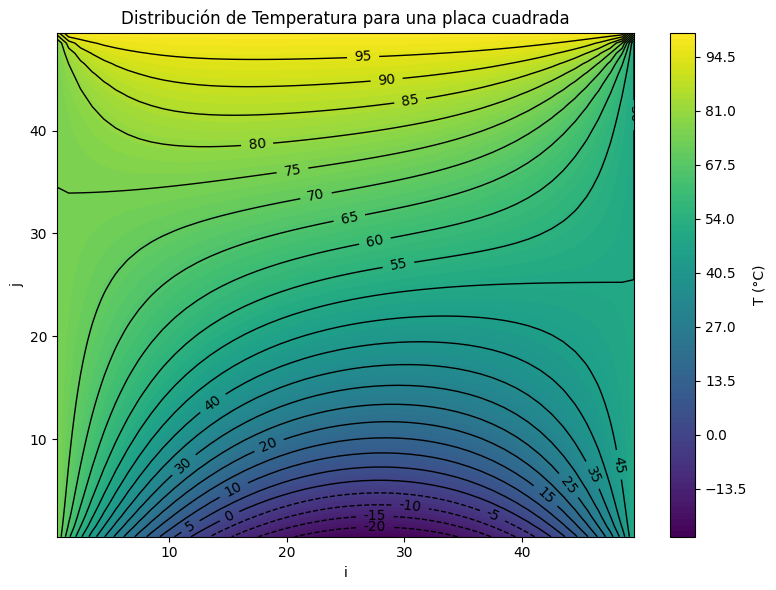

In [31]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))

numSeparaciones = 100  
numLineas = 25     

mappable = ax.contourf(T.reshape(Nx, Ny), levels=numSeparaciones, origin='upper', cmap='viridis')

levels = ax.contour(T.reshape(Nx, Ny), levels=numLineas, colors='k', linewidths=1,origin='upper')

cbar = plt.colorbar(mappable)
cbar.set_label('T (°C)')

ax.clabel(levels, inline=True, fontsize=10, fmt='%1.0f')


ax.set_xlabel('i')
ax.set_ylabel('j')
ax.set_title('Distribución de Temperatura para una placa cuadrada')

plt.tight_layout()
plt.show()